In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [47]:
np.random.seed(42)
x, y = make_circles(n_samples=1000, factor=0.1, noise=0.4, random_state=42)
x = x*np.random.rand()

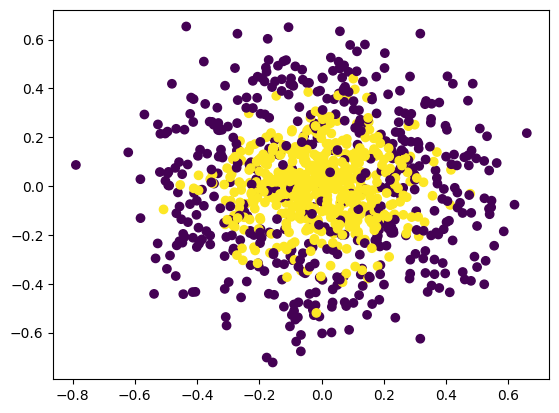

In [48]:
plt.scatter(x[:, 0], x[:, 1], c=y)

In [49]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [50]:
def score(model, x, y, cv=10):
    print(np.mean(cross_val_score(model, x, y, scoring='accuracy', cv=10)))

>Default

In [51]:
abc = AdaBoostClassifier(algorithm='SAMME')
score(abc, x, y)
abc.fit(x, y)

0.7809999999999999


AdaBoostClassifier(algorithm='SAMME')

In [58]:
def plot_boundary(clf):
    plt.figure(figsize=(12, 8))
    x_range = np.linspace(x.min(), x.max(), 100)
    X1, X2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[X1.ravel(), X2.ravel()])
    y_hat = y_hat.reshape(X1.shape)
    plt.contourf(X1, X2, y_hat, alpha=0.4)
    plt.scatter(x[:,0], x[:,1], c=y, cmap='viridis', alpha=0.7)
    plt.title('AdaBoostClassifier')
    plt.show()

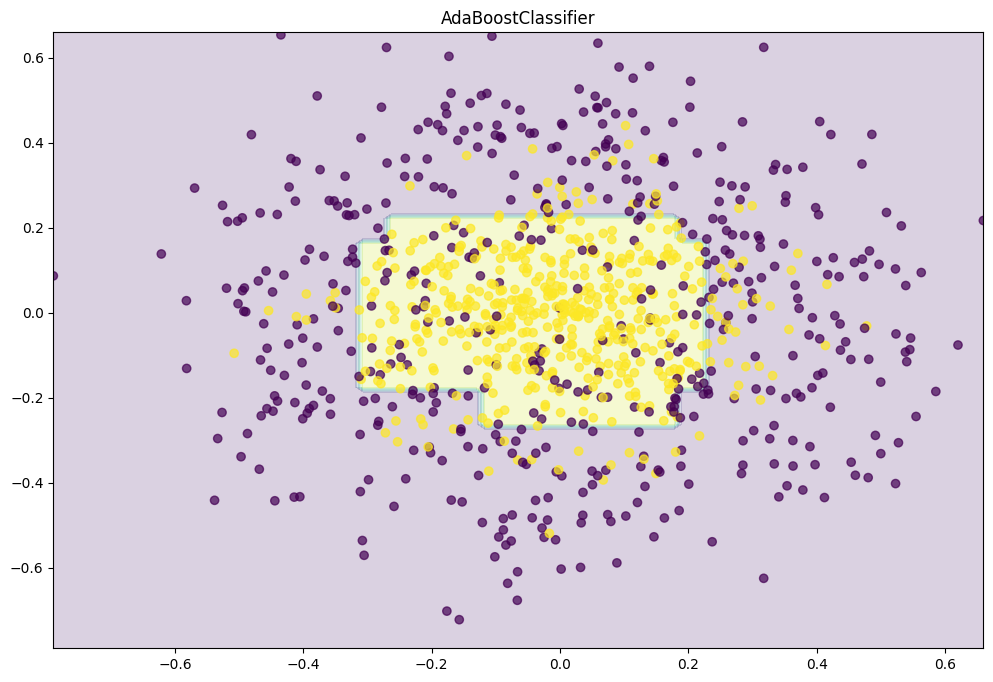

In [53]:
plot_boundary(abc)

> Hyperparameter

In [71]:
abc1 = AdaBoostClassifier(n_estimators=300, algorithm='SAMME')
score(abc1, x, y)
abc1.fit(x, y)

0.792


AdaBoostClassifier(algorithm='SAMME', n_estimators=300)

>## Learning Rate:
- learning rate by default is 1
- it multiply with alpha (alpha = (1/2)log((1-error)/error))
- alpha = alpha * lr
- since by default it is 1, so no change in alpha
- lr values should be in betweeen (0-1)
- when lr is less than 1, then alpha is reduced, since alpha is reduced then, 
- new_wts = old_wts + alpha 
- since alpha is too small due to learning rate, also new_wts will be small
- so learning of ada boost from previos model is too slow
- due to new minor changes in new_wts 
- in this way 
    - {n_estimator = (larger value), learning_rate = (less than 1)} and {n_estimator = (normal value)}
    - are equal

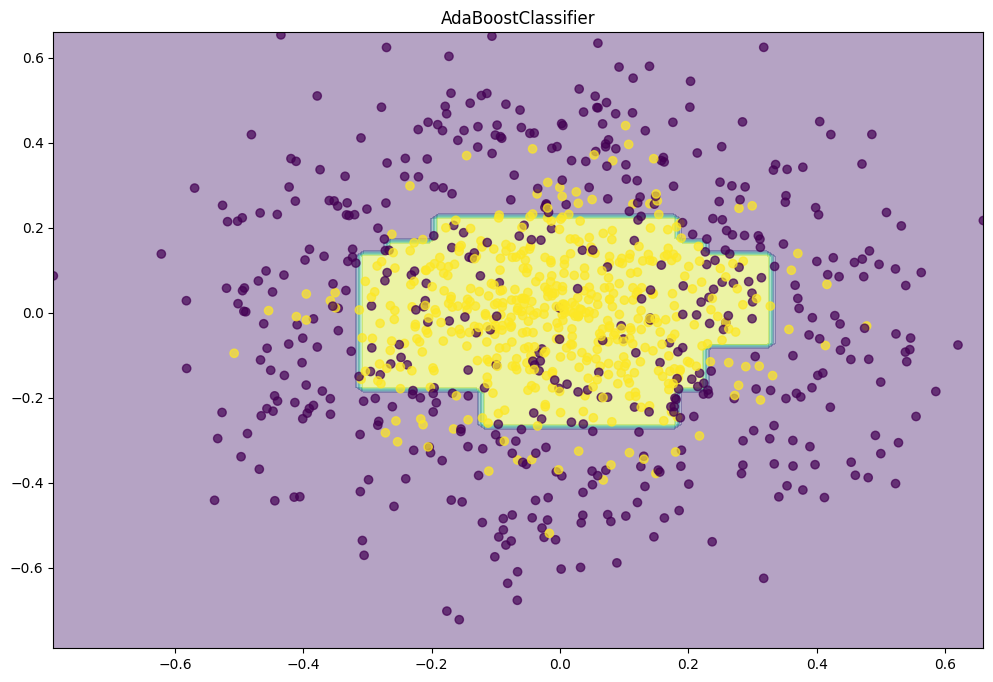

In [72]:
plot_boundary(abc1)

In [73]:
from sklearn.model_selection import GridSearchCV

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']


grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(x, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best: 0.788000 using {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}
